In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten,BatchNormalization,MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
path = '/content/drive/MyDrive/Datasets/fer2013_2_classes.zip'
zip_object = zipfile.ZipFile(file=path,mode='r')
zip_object.extractall('./')
zip_object.close()

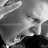

In [10]:
tf.keras.preprocessing.image.load_img('/content/fer2013_2_classes/train/Angry/1004.jpg')

In [12]:
img = cv2.imread('/content/fer2013_2_classes/train/Angry/1004.jpg')

In [13]:
img.shape

(48, 48, 3)

In [14]:
training_generator = ImageDataGenerator(rescale=1./255,rotation_range=7,horizontal_flip=True,zoom_range=0.2)
train_dataset = training_generator.flow_from_directory('/content/fer2013_2_classes/train',target_size=(48,48),batch_size=16,class_mode='categorical',shuffle=True)


Found 11210 images belonging to 2 classes.


In [15]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [16]:
np.unique(train_dataset.classes,return_counts=True)

(array([0, 1], dtype=int32), array([3995, 7215]))

In [17]:
train_dataset.class_indices

{'Angry': 0, 'Happy': 1}

<AxesSubplot:ylabel='count'>

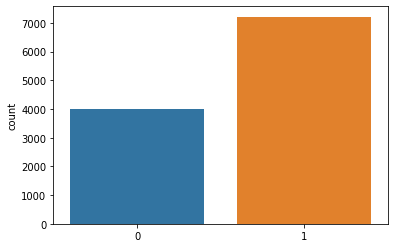

In [18]:
sns.countplot(x=train_dataset.classes)

In [19]:
test_generator = ImageDataGenerator(rescale=1./255)
test_dataset = test_generator.flow_from_directory('/content/fer2013_2_classes/validation',target_size=(48,48),batch_size=1,class_mode = 'categorical',shuffle=False)

Found 1370 images belonging to 2 classes.


In [32]:
network = Sequential()
network.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu',input_shape=(48,48,3)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters=16,kernel_size=(3,3),activation='relu'))
network.add(MaxPool2D(pool_size=(2,2)))


network.add(Flatten())

network.add(Dense(units=801,activation='relu'))
network.add(Dense(units=801,activation='relu'))
network.add(Dense(units=2,activation='softmax'))
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 801)              

In [31]:
1602/2

801.0

In [33]:
network.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [36]:
history = network.fit(train_dataset,epochs=50)

Epoch 1/50
701/701 [==============================] - 15s 21ms/step - loss: 0.3384 - accuracy: 0.8490
Epoch 2/50
701/701 [==============================] - 14s 21ms/step - loss: 0.3261 - accuracy: 0.8559
Epoch 3/50
701/701 [==============================] - 14s 21ms/step - loss: 0.3172 - accuracy: 0.8580
Epoch 4/50
701/701 [==============================] - 14s 21ms/step - loss: 0.3060 - accuracy: 0.8612
Epoch 5/50
701/701 [==============================] - 14s 21ms/step - loss: 0.3017 - accuracy: 0.8661
Epoch 6/50
701/701 [==============================] - 14s 20ms/step - loss: 0.2895 - accuracy: 0.8742
Epoch 7/50
701/701 [==============================] - 15s 21ms/step - loss: 0.2867 - accuracy: 0.8741
Epoch 8/50
701/701 [==============================] - 14s 20ms/step - loss: 0.2747 - accuracy: 0.8825
Epoch 9/50
701/701 [==============================] - 15s 21ms/step - loss: 0.2744 - accuracy: 0.8803
Epoch 10/50
701/701 [==============================] - 16s 23ms/step - loss: 0.268

In [37]:
model_json = network.to_json()
with open('network_2emot.json','w') as json_file:
  json_file.write(model_json)

In [38]:
from keras.models import save_model
network_saved = save_model(network, '/content/weights_2emot.hdf5')

In [39]:
with open('/content/network_2emot.json','r') as json_file:
  json_saved_model = json_file.read()
json_saved_model  

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 48, 48, 3], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_11_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d_11", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 48, 48, 3], "filters": 16, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d_6", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": 

In [40]:
network_loaded  = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('/content/weights_2emot.hdf5')
network_loaded.compile(loss = 'categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [41]:
network_loaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_5 (Dense)             (None, 801)              

In [42]:
network_loaded.evaluate(test_dataset)

1370/1370 [==============================] - 5s 3ms/step - loss: 0.4335 - accuracy: 0.8723


[0.4335125684738159, 0.8722627758979797]

In [43]:
predictions = network_loaded.predict(test_dataset)
predictions

1370/1370 [==============================] - 3s 2ms/step


array([[9.9740171e-01, 2.5983045e-03],
       [9.9999988e-01, 1.7683850e-07],
       [9.9526298e-01, 4.7370279e-03],
       ...,
       [3.3507810e-09, 1.0000000e+00],
       [4.7157364e-06, 9.9999523e-01],
       [2.3574079e-05, 9.9997640e-01]], dtype=float32)

In [44]:
predictions = np.argmax(predictions,axis=1)
predictions

array([0, 0, 0, ..., 1, 1, 1])

In [45]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [46]:
print(classification_report(test_dataset.classes,predictions))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82       491
           1       0.90      0.90      0.90       879

    accuracy                           0.87      1370
   macro avg       0.86      0.86      0.86      1370
weighted avg       0.87      0.87      0.87      1370



In [47]:
accuracy_score(test_dataset.classes,predictions)*100

87.22627737226277

In [48]:
confusion_matrix(test_dataset.classes,predictions)

array([[404,  87],
       [ 88, 791]])

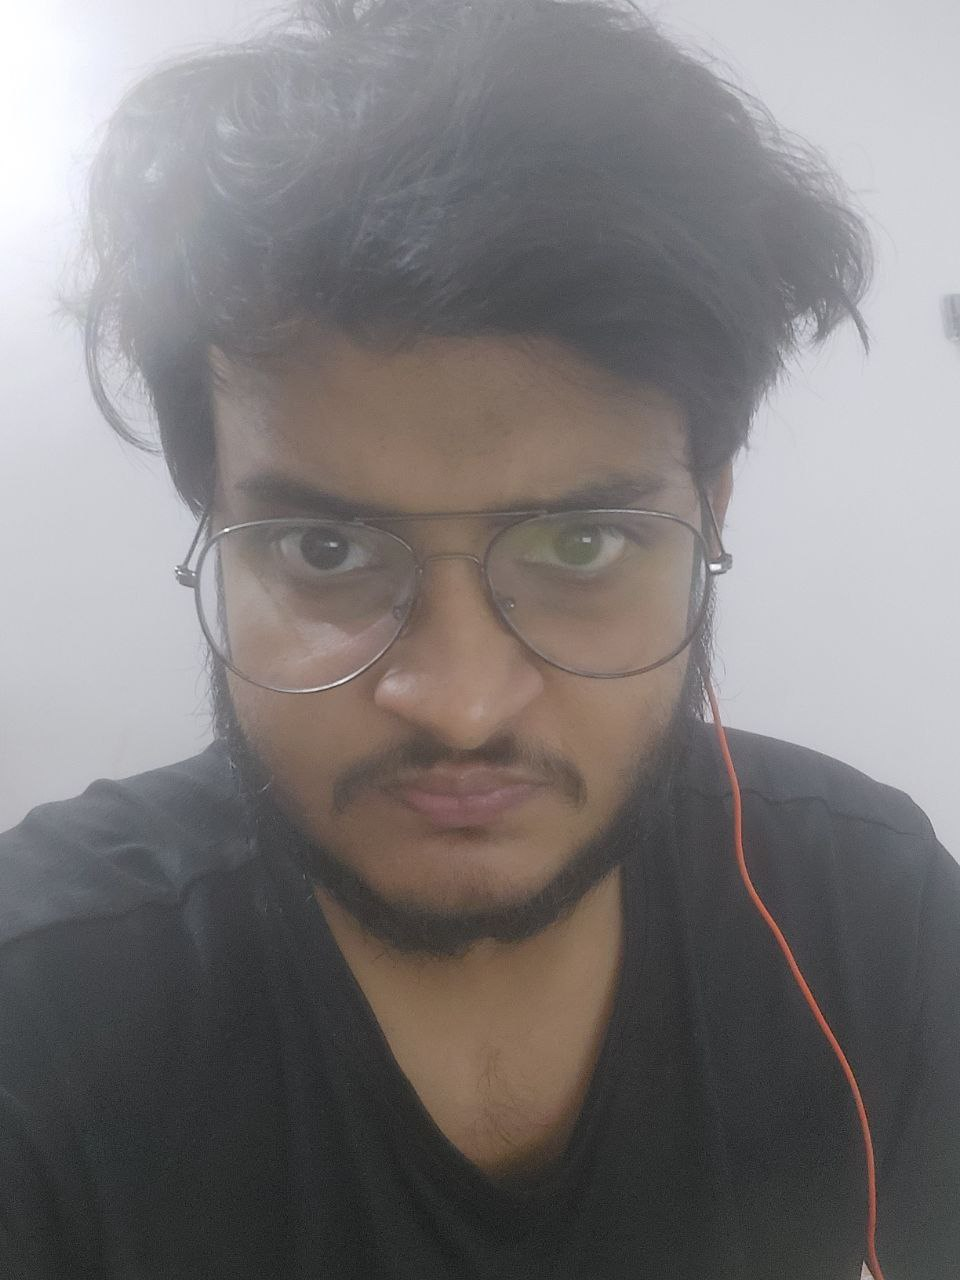

In [96]:
image = cv2.imread('/content/photo_2023-02-26_03-30-06.jpg')
cv2_imshow(image)

In [97]:
image.shape

(1280, 960, 3)

In [98]:
face_detector = cv2.CascadeClassifier('/content/drive/MyDrive/Cascades/haarcascade_frontalface_default.xml')

In [99]:
original_image = image.copy()
faces = face_detector.detectMultiScale(original_image)

In [100]:
faces

array([[168, 342, 574, 574]], dtype=int32)

In [101]:
roi = image[342:342 + 574, 168:168 + 574]  #raisin of interest - roi
# array([[162,  40, 128, 128]]

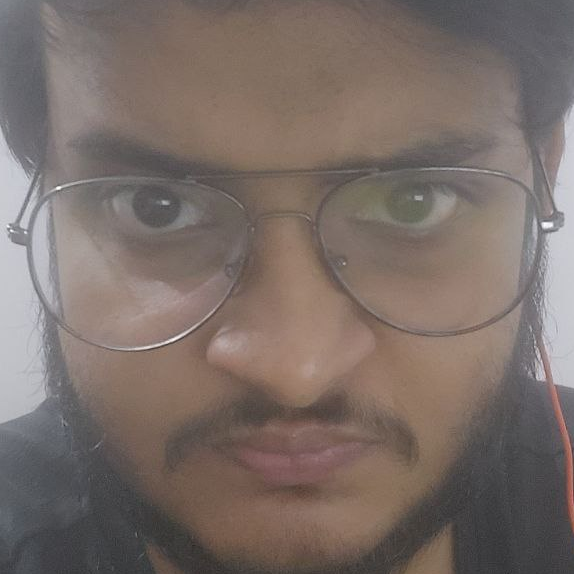

In [102]:
cv2_imshow(roi)

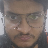

In [103]:
roi = cv2.resize(roi,(48,48))
cv2_imshow(roi)

In [104]:
roi = roi / 255

In [105]:
roi

array([[[0.53333333, 0.50588235, 0.49411765],
        [0.48235294, 0.4627451 , 0.45098039],
        [0.4745098 , 0.45490196, 0.45882353],
        ...,
        [0.39215686, 0.37254902, 0.36862745],
        [0.38823529, 0.36470588, 0.36470588],
        [0.40784314, 0.38823529, 0.38431373]],

       [[0.49019608, 0.4627451 , 0.45098039],
        [0.4627451 , 0.43921569, 0.44313725],
        [0.44705882, 0.42745098, 0.43137255],
        ...,
        [0.37647059, 0.35294118, 0.35686275],
        [0.38431373, 0.36470588, 0.36470588],
        [0.41176471, 0.38823529, 0.38039216]],

       [[0.47058824, 0.43921569, 0.43921569],
        [0.43921569, 0.41960784, 0.41568627],
        [0.44313725, 0.41960784, 0.42352941],
        ...,
        [0.38431373, 0.36078431, 0.36470588],
        [0.39607843, 0.37254902, 0.37647059],
        [0.41176471, 0.39215686, 0.38823529]],

       ...,

       [[0.3372549 , 0.31764706, 0.30588235],
        [0.30196078, 0.28235294, 0.27058824],
        [0.31372549, 0

In [106]:
roi = np.expand_dims(roi,axis=0)
roi.shape

(1, 48, 48, 3)

In [107]:
probs = network_loaded.predict(roi)
probs

1/1 [==============================] - 0s 21ms/step


array([[0.5273421 , 0.47265786]], dtype=float32)

In [108]:
result = np.argmax(probs)
result

0

In [109]:
test_dataset.class_indices

{'Angry': 0, 'Happy': 1}

In [110]:
if result == 1:
  print('Happy')
else:
  print('Angry')  

Angry
